# ASSIGNMENT 3

# Term Frequency Inverse Document Frequency (TFIDF)

In [43]:
# Importing Library

import pandas as pd

In [24]:
# Importing Dataset

file = r"D:\SHU\Sem 2\TBA 2\podcastdata_dataset.csv"
df = pd.read_csv(file)
df.head(20)

,id,guest,title,text
0,1,Max Tegmark,Life 3.0,"As part of MIT course 6S099, Artificial Genera..."
1,2,Christof Koch,Consciousness,As part of MIT course 6S099 on artificial gene...
2,3,Steven Pinker,AI in the Age of Reason,"You've studied the human mind, cognition, lang..."
3,4,Yoshua Bengio,Deep Learning,What difference between biological neural netw...
4,5,Vladimir Vapnik,Statistical Learning,The following is a conversation with Vladimir ...
5,6,Guido van Rossum,Python,The following is a conversation with Guido van...
6,7,Jeff Atwood,Stack Overflow and Coding Horror,The following is a conversation with Jeff Atwo...
7,8,Eric Schmidt,Google,The following is a conversation with Eric Schm...
8,9,Stuart Russell,Long-Term Future of AI,The following is a conversation with Stuart Ru...
9,10,Pieter Abbeel,Deep Reinforcement Learning,The following is a conversation with Peter Abb...


In [25]:
# Importing Library Natural Language Toolkit (NLTK)

import nltk

In [26]:
# Downloading Stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Yogesh
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# Storing stopwords in a variable

stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'above', 'our', 'during', 'can', 'o', 'into', "mustn't", 'they', 'mightn', 'theirs', 'mustn', 'be', 'through', 'before', 'wasn', 'then', 'both', 'was', 'himself', 've', "it's", 'has', 'below', 'll', 'an', "should've", 'as', 'but', 'have', 'you', "won't", 'each', 'at', 'd', 'herself', "hadn't", "mightn't", 'where', "don't", 'being', "haven't", 'aren', 'such', 'hers', 'than', 'whom', 'their', 'doesn', 'or', 'didn', 'off', 'between', "doesn't", 'it', "weren't", 'down', "you're", 'shouldn', 'further', "aren't", 'when', 'ourselves', 'themselves', "shouldn't", 'm', 'too', "wouldn't", "didn't", 'weren', "needn't", 'by', 'which', 'them', 'ours', 'were', 'nor', 'this', 'if', 'against', 'does', 'been', 'don', 'having', 'what', 'why', 'yourselves', 'my', 'hasn', 'ma', 'same', 'should', 'a', 'these', 'ain', "hasn't", 't', 'from', 'she', 'out', 'once', 'in', 'that', 'itself', 'of', 'again', 'am', 'under', 'those', 'doing', 'its', 'the', 'yourself', "wasn't", "you'll", 'not', 'shan', 'own', 'after'

In [28]:
# Importing regex library for regular expression

import regex as re

In [29]:
# Pre - processing pipeline

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]

In [30]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [31]:
# Importing Counter module from collections library

from collections import Counter

In [32]:
# Counting the tokens

counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
like,82879
think,43601
know,42902
people,31814
one,24901
right,24842
yeah,21576
really,20819
kind,20808


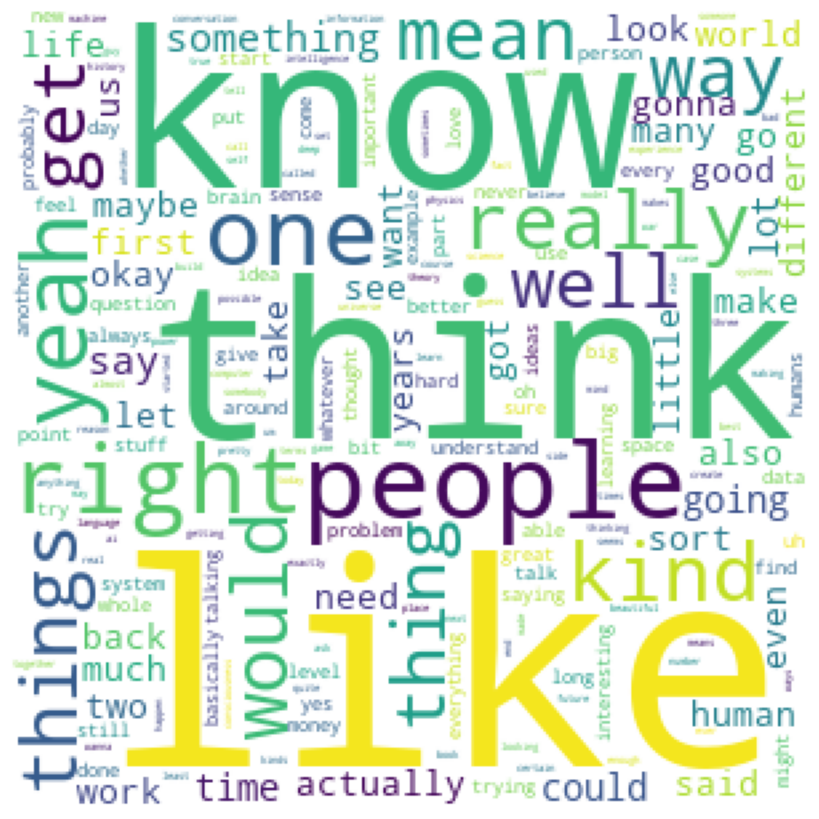

In [33]:
# Drawing the word cloud

from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [34]:
# Importing numpy library

import numpy as np

In [35]:
# Term Frequency Inverse Document Frequency (TFIDF)

def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
        # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [36]:
# TFIDF = TF * IDF

freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
like,82879,8287.9
think,43601,4360.1
know,42902,4290.2
people,31814,3181.4
one,24901,2490.1


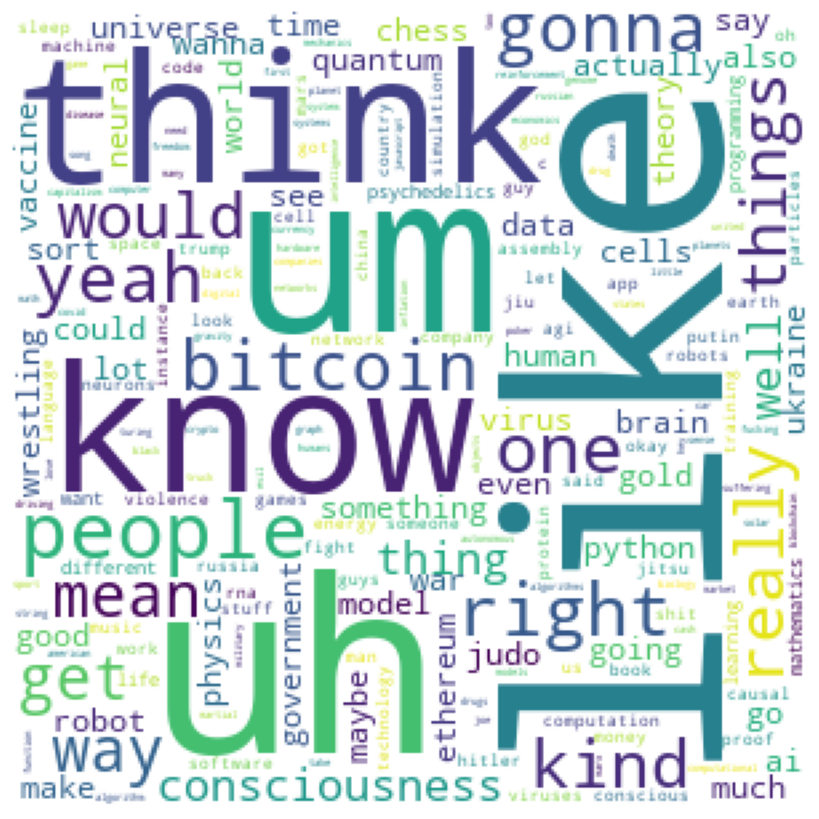

In [37]:
# Drawing the word cloud

wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [38]:
# Function to count the keywords

df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [39]:
# Function to group by year

def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

In [40]:
import seaborn as sns

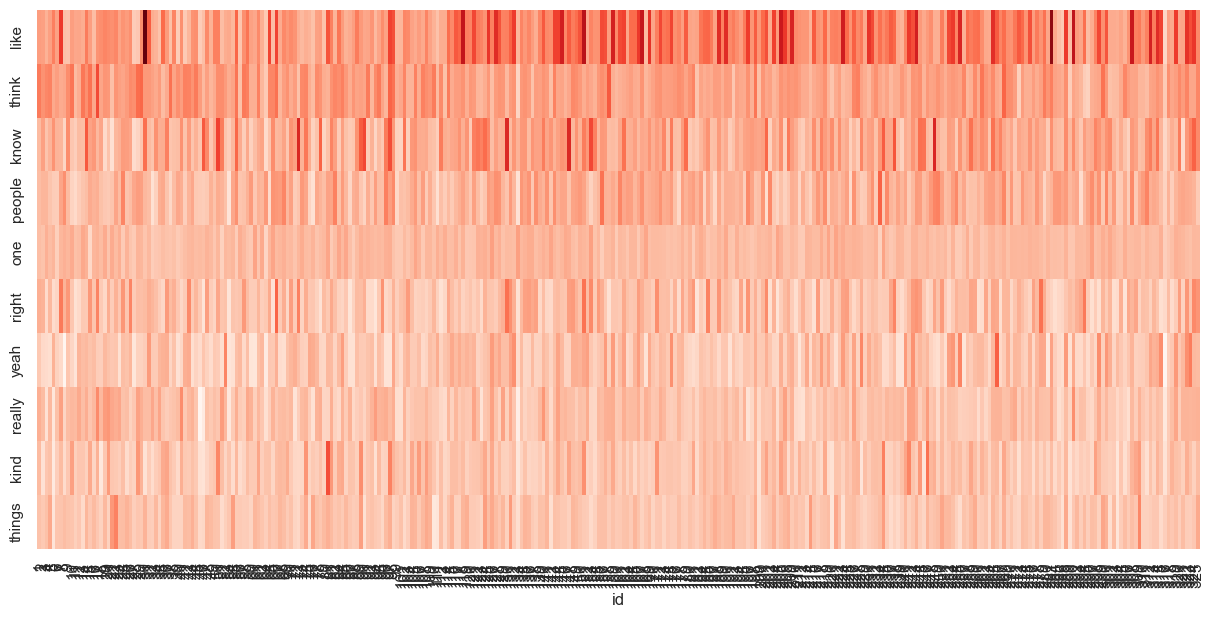

In [42]:
# Drawing the chart

keywords = ['like','think','know','people','one','right','yeah','really','kind','things']
freq_df = count_keywords_by(df, by='id', keywords=keywords)# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('id')['num_tokens'].sum(), axis=0)# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)